In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
h=1
sd=1
n=50

def gen_data(n,h,sd1,sd2):
    x1=ss.norm.rvs(-h,sd1,n)
    y1=ss.norm.rvs(0,sd1,n)
    x2=ss.norm.rvs(h,sd2,n)
    y2=ss.norm.rvs(0,sd2,n)
    return (x1,y1,x2,y2)

In [4]:
(x1,y1,x2,y2) = gen_data(50,1,1,1.5) 

In [5]:
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5) 

In [6]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

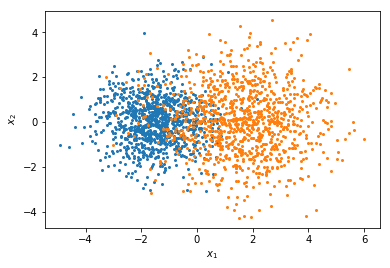

In [7]:
plot_data(x1,y1,x2,y2)

In [8]:
import scipy.stats as ss
import matplotlib.pyplot as plt

def gen_data(n, h, sd1, sd2):
   x1 = ss.norm.rvs(h, sd1, n)
   y1 = ss.norm.rvs(0, sd1, n)
   x2 = ss.norm.rvs(-h, sd2, n)
   y2 = ss.norm.rvs(0, sd2, n)
   return (x1, y1, x2, y2)

def plot_data(x1, y1, x2, y2):
   plt.figure()
   plt.plot(x1, y1, "o", ms=2)
   plt.plot(x2, y2, "o", ms=2)
   plt.xlabel("$X_1$")
   plt.ylabel("$X_2$")

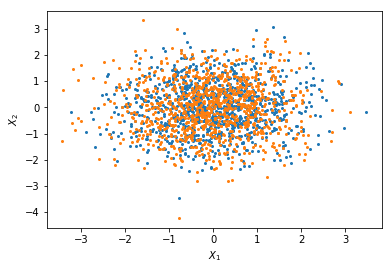

In [10]:
(x1,y1,x2,y2) = gen_data(1000, 0, 1, 1)
plot_data(x1, y1, x2, y2)
#HARDEST TO CLASSIFY

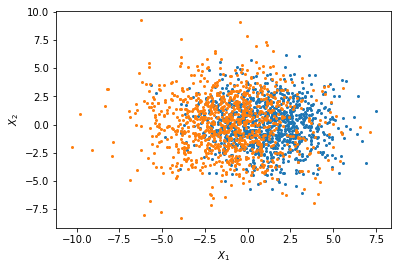

In [11]:
(x1,y1,x2,y2) = gen_data(1000, 1, 2, 2.5)
plot_data(x1, y1, x2, y2)

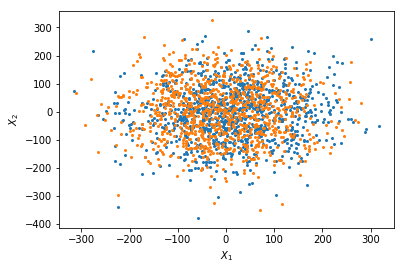

In [12]:
(x1,y1,x2,y2) = gen_data(1000, 10, 100, 100)
plot_data(x1, y1, x2, y2)

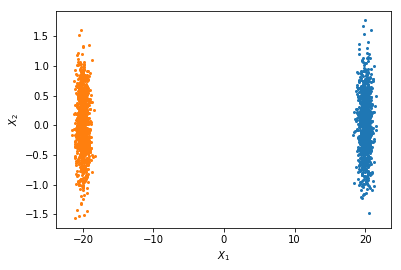

In [13]:
(x1,y1,x2,y2) = gen_data(1000, 20, .5, .5)
plot_data(x1, y1, x2, y2)
#EASIEST TO CLASSIFY

In [14]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [22]:
print(prob_to_odds(0.1))
print(prob_to_odds(0.2))
print(prob_to_odds(0.3))
print(prob_to_odds(0.4))
print(prob_to_odds(0.5))
print(prob_to_odds(0.6))
print(prob_to_odds(0.7))
print(prob_to_odds(0.8))
print(prob_to_odds(0.9))

0.11111111111111112
0.25
0.4285714285714286
0.6666666666666667
1.0
1.4999999999999998
2.333333333333333
4.000000000000001
9.000000000000002


In [62]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression()
(x1,y1,x2,y2) = gen_data(1000,1.5,1,1.5) 
X=np.vstack((np.vstack((x1,y1)).T,np.vstack((x2,y2)).T))

In [63]:
X.shape

(2000, 2)

In [64]:
n = 1000
y = np.hstack((np.repeat(1,n),np.repeat(2,n)))

In [65]:
y.shape

(2000,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.5,random_state=1)

In [67]:
print(X_train.shape)
print(y_train.shape)

(1000, 2)
(1000,)


In [68]:
clf.fit(X_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
clf.score(X_test,y_test)

0.889

In [70]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.01600592, 0.98399408]])

In [71]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([2])

In [72]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

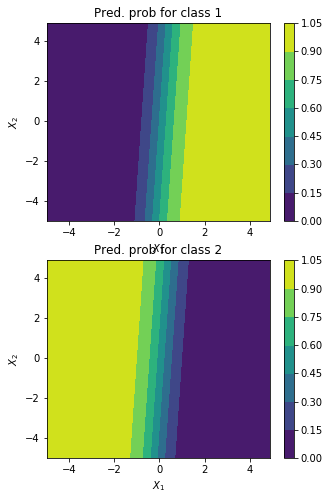

In [73]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");